### Coefficient of relaxation： penalty factor ( ζ : zeta)

how does zeta affect the SVM classification? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification\

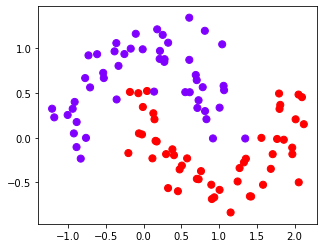

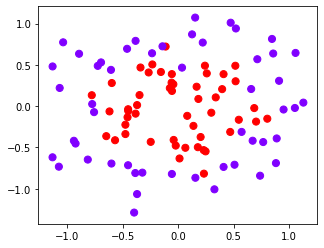

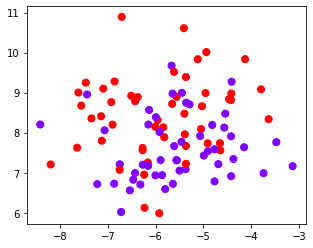

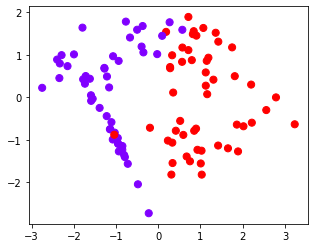

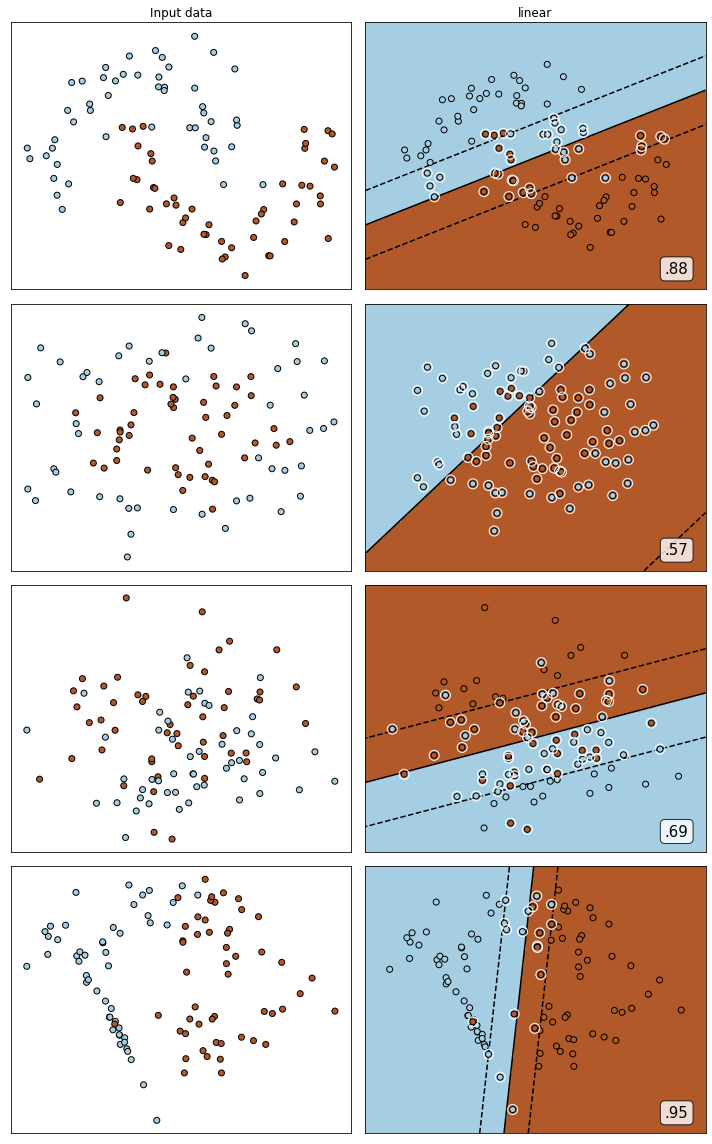

In [2]:
n_samples = 100

datasets = [
        make_moons(n_samples=n_samples, noise=0.2, random_state=0), 
        make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1), 
        make_blobs(n_samples=n_samples, centers=2, random_state=5), 
        make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
            ]
Kernel = ["linear"]


#four datasets? 
for X,Y in datasets:

    plt.figure(figsize=(5,4)) 
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

nrows=len(datasets)
ncols=len(Kernel) + 1

fig, axes = plt.subplots(nrows, ncols,figsize=(10,16)) 

#First loop: differenct datasets
for ds_cnt, (X,Y) in enumerate(datasets):
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k') 
    ax.set_xticks(())
    ax.set_yticks(())

    for est_idx, kernel in enumerate(Kernel):
        
        ax = axes[ds_cnt, est_idx + 1]
        
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)

        ax.scatter(X[:, 0], X[:, 1], c=Y ,zorder=10
                    ,cmap=plt.cm.Paired,edgecolors='k') 
        ax.scatter(clf.support_vectors_[:, 0], 
                    clf.support_vectors_[:, 1], s=100,
                    facecolors='none', zorder=10, edgecolors='white') 
        
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]

        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape) 
        
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                   linestyles=['--', '-', '--'],
                   levels=[-1, 0, 1]) 
        
        ax.set_xticks(())
        ax.set_yticks(()) 
        
        if ds_cnt == 0:
            ax.set_title(kernel)

        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0') , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white') #white grid background
                , transform=ax.transAxes #define text axes
                , horizontalalignment='right' #locate direction
               )

plt.tight_layout() 
plt.show()

## Sample unbalanced: catch minority

Accuracy: improve accuracy for majority. If we are going to catch minority, we will fail. So how to solve this problem?

- insert penalty. 
- let machine knows we are looking for minority.
- Not increase sample size.
- Adjust paramaters: class_weight, sample_weight.（choose only one）

use dictionary: {'major':weight, 'minor':weight} or use balanced mode. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

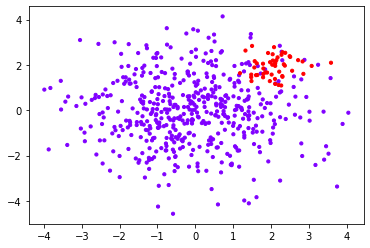

In [4]:
class_1 = 500 #class1: 500 samples
class_2 = 50 #class2: 50 samples
centers = [[0.0, 0.0], [2.0, 2.0]] #define center for two classes
clusters_std = [1.5, 0.5] #define std. 

X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)
#check dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10) 
#red dots are minority, purple dots are majority

In [5]:
#Not define class_weight
clf = svm.SVC(kernel='linear', C=1.0) 
clf.fit(X, y)

#define class_weight
wclf = svm.SVC(kernel='linear', class_weight={1: 10}) 
wclf.fit(X, y)

#check accuracy score for two classes， 
print(clf.score(X,y))
print(wclf.score(X,y))

0.9418181818181818
0.9127272727272727


### Decision boundary for two models:

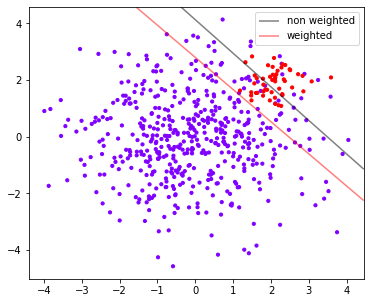

In [6]:
#Data distributed
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10) 
ax = plt.gca()  #Get subplots, if not exist, create one:

#First Step: meshgrid

xlim = ax.get_xlim() 
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#Second Step: fint the distance between samples and decision boundary
Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])
Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])


#Third Step: Graph:
plt.legend([a.collections[0], b.collections[0]], 
           ["non weighted", "weighted"],
           loc="upper right")
plt.show()

In [7]:
#How to achieve graph? 

a.collections #调用这个等高线对象中画的所有线，返回一个惰性对象 #用[*]把它打开试试看
[*a.collections] #返回了一个linecollection对象，其实就是我们等高线里所有的线的列表 #现在我们只有一条线，所以我们可以使用索引0来锁定这个对象
a.collections[0]
#plt.legend([对象列表],[图例列表],loc) #只要对象列表和图例列表相对应，就可以显示出图例

## SVC - Model Performance Indicators

- case one: find Majority - satisfy high accuracy 
- case two: find minority - fraud customers catch/ refuse good customers request (in bank)

**Cost-Benefit Analysis** : ROC and confusion matrix

### Confusion Matrix: inbalance data {0, 1}  -  Majority of errors

- Accuracy = <font color='green'>TT + FF</font> / <font color='Orange'>(TT + TF + FT + FF)</font>

TT and FF (if as numerator is wish to approach 1) 
TF and FT (if as numerator is wish to approach 0)

- Specificity = <font color='green'>FF</font> / <font color='Orange'>(FT + FF)</font>

 - 1 - Specificity = False positive Rate : FT/ FT + FF

In [8]:
#Specificity: for no class_weight, no balance gray decision boundary.
#All predicted correctly False samples / all include False samples
(y[y == clf.predict(X)] == 0).sum()/(y == 0).sum()

0.976

In [9]:
#Specificity for class_weight, balance red decision boundary
(y[y == wclf.predict(X)] == 0).sum()/(y == 0).sum()

0.904

#### Confusion Matrix: inbalance data {0, 1} - Catch Minority

- Precision = <font color='green'>TT</font> / <font color='Orange'>(TT + FT)</font>



- Sensitivity = <font color='green'>TT</font> / <font color='Orange'>(TT + TF)</font>
 - Recall, also known as sensitivity. is the percentage of all samples with a true value of 1 that we predicted to be correct.
 - 1 - Sensitivity = False Negative Rate: TF / TT + TF

In [10]:
#Precision:
#For gray decision boundary, no class_weight, no normalize inbalance sample
(y[y == clf.predict(X)] == 1).sum()/(clf.predict(X) == 1).sum()

0.7142857142857143

In [11]:
#Precision: weight clf (wclf)
#For red decision boundary, have class_weight, have normalize inblance
(y[y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum()

0.5102040816326531

You can see that when you do the sample balance, the accuracy goes down. Because obviously, after the sample is balanced, there are more of the majority of the purple spots that we've hit by mistake. 

Accuracy helps us determine whether the predictions for a few categories are accurate at a time, so it is also called "precision." In real-world examples of sample imbalances, **when the cost of misjudging most categories is very high (as in the case of a Volkswagen recall), we seek high accuracy**. The less accurate we are, the more wrong we are about most classes.

In [12]:
#Sensitivity: all predicted as True / all True included
#For the grey decision boundary with no class_weight and no sample balance:

(y[y == clf.predict(X)] == 1).sum()/(y == 1).sum()

0.6

In [13]:
#Sensitivity:
#For the red decision boundary with class_weight and sample balance:
(y[y == wclf.predict(X)] == 1).sum()/(y == 1).sum()

1.0

The higher the recall rate, the more minority classes we try to capture, and the lower the recall rate, the less minority classes we capture.

If we want to find a few categories at all costs (such as examples of potential offenders), then we will pursue a high recall rate, whereas if our goal is not to capture as few categories as possible, then we need not care about the recall rate.

- **sklearn.metrics.confusion_matrix** : confusion_matrix
- **sklearn.metrics.accuracy_score**  : accuracy
- **sklearn.metrics.precision_score** : precision
- **sklearn.metrics.recall_score**    : Sensitivity
- **sklearn.metrics.precision_recall_curve**  : Precision - recall rate equilibrium curve
- **sklearn.metrics.f1_score**  : F1 measure

## ROC:

ROC Curve, The Receiver Operating Characteristic Curve. This is a curve that takes the false positive rate FPR under different thresholds as the abscissa and the Recall rate under different thresholds as the ordinate. Let's start with probabilities and thresholds

### Probability and Threshold:

The predict_proba interface for logistic regression generates likelihood (class probability) under each tag category for each sample. For these probabilities, logistic regression stipulates that when the likelihood under the label category corresponding to a sample is greater than 0.5, the sample is classified into this category.

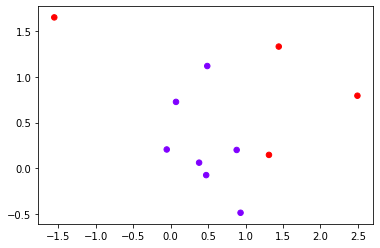

In [14]:
#Self establish dataset:
class_1_ = 7
class_2_ = 4
centers_ = [[0.0, 0.0], [1,1]]
clusters_std = [0.5, 1]
X_, y_ = make_blobs(n_samples=[class_1_, class_2_],
                  centers=centers_,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap="rainbow",s=30)
plt.show()

In [15]:
#Modeling, use probability 
from sklearn.linear_model import LogisticRegression as LogiR 
import pandas as pd

clf_lo = LogiR(random_state = 10).fit(X_,y_)
prob = clf_lo.predict_proba(X_) #likelihood
#Put the sample and probability into a DataFrame

prob = pd.DataFrame(prob)
prob.columns = ["0","1"] 
prob   # > 0.5 == 1 class, < 0.5 ==0 class

,0,1
0,0.694619,0.305381
1,0.510931,0.489069
2,0.820038,0.179962
3,0.785647,0.214353
4,0.777387,0.222613
5,0.656634,0.343366
6,0.768586,0.231414
7,0.349171,0.650829
8,0.366184,0.633816
9,0.663272,0.336728


In [16]:
#use threshold:
for i in range(prob.shape[0]):

    if prob.loc[i,"1"] > 0.5: 
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

prob["y_true"] = y_
prob = prob.sort_values(by="1",ascending=False) 
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,0.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [17]:
#confusion matrics:
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R

CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
#2 and 7 are prediction correct, 2 and 0 are TF %FT: Correct = 2+ 7

array([[2, 2],
       [0, 7]])

In [18]:
# precison_score
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

1.0

In [19]:
# recall - score
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.5

#### if we chang threshold to 0.4???

In [20]:
for i in range(prob.shape[0]): 
    if prob.loc[i,"1"] > 0.4:
        prob.loc[i,"pred"] = 1 
    else:
        prob.loc[i,"pred"] = 0
        
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,1.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [21]:
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
#Accuracy = 2 + 6 =8 (< 9)

array([[2, 2],
       [1, 6]])

In [22]:
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
#precision decreasing,too many of the classes were classes wrong!

0.6666666666666666

In [23]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.5

### SVM for Probability Prodiction

**Important Portals/ parameters**:
- probability (parameters: =True)
- predict_proba
- decision_function : as confidence 

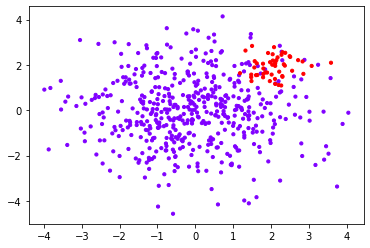

In [24]:
#Original dataset, inbalance. 
class_1 = 500 
class_2 = 50 
centers = [[0.0, 0.0], [2.0, 2.0]] #
clusters_std = [1.5, 0.5]  
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10) 

In [25]:
clf_proba = svm.SVC(kernel="linear",C=1.0,probability=True).fit(X,y) 
clf_proba.predict_proba(X)               #To start prob param: need True
                               #(550 rows, 2 columns)

array([[0.68478223, 0.31521777],
       [0.25266793, 0.74733207],
       [0.96477149, 0.03522851],
       ...,
       [0.1464584 , 0.8535416 ],
       [0.34656019, 0.65343981],
       [0.30552911, 0.69447089]])

In [26]:
clf_proba.decision_function(X) #(550 rows, 1 column)

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

In [27]:
# How to get FPR(X-axis) and Recall(y-axis) from confusion matrics?
# we also need probability

cm = CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
cm

array([[2, 2],
       [1, 6]])

In [28]:
#FPR
cm[1,0]/cm[1,:].sum() 

0.14285714285714285

In [29]:
#Recall
cm[0,0]/cm[0,:].sum()

0.5

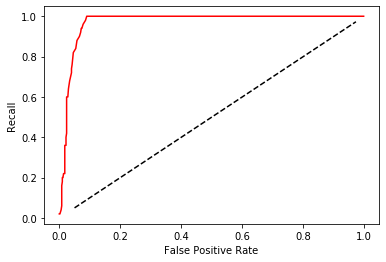

In [51]:
#roc

recall = [] 
FPR = []

probrange = np.linspace(clf_proba.predict_proba(X) 
                        [:,1].min(),
                        clf_proba.predict_proba(X)[:,1].max(),
                        num=50,endpoint=False)
                        #endpoint = false measn not reach the maximum point

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1) 
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0]) 
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())

recall.sort()
FPR.sort()
         #x-axis:FPR, y-axis:Revall
plt.plot(FPR,recall,c="red") 
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--") 
plt.show()

### Sklearn ROC curve and AUC area

- sklearn.metrics.roc_curve (y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)

- sklearn.metrics.roc_auc_score (y_true, y_score, average=’macro’, sample_weight=None, max_fpr=None)

In [31]:
from sklearn.metrics import roc_curve

a = roc_curve(y,clf_proba.decision_function(X), pos_label=1) 

In [32]:
a

(array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
        0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
        0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
        0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
        0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ]),
 array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
        0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
        0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
        0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
        1.  ]),
 array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
          1.33920817,   1.14038015,   1.13383091,   1.00003406,
          0.85085628,   0.84476439,   0.78571364,   0.60568093,
          0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
         -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
         -0

In [33]:
FPR, recall, thresholds = roc_curve(y,clf_proba.decision_function(X), pos_label=1) 

In [34]:
FPR #(45,)

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [35]:
recall #(45,)

array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
       0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
       0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
       0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
       1.  ])

In [36]:
thresholds #(45,)
#Now the threshold is not a probability value, but a threshold in the distance value, so it can be greater than 1, or it can be negative

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [37]:
from sklearn.metrics import roc_auc_score as AUC 
    
area = AUC(y,clf_proba.decision_function(X))
area

0.9696400000000001

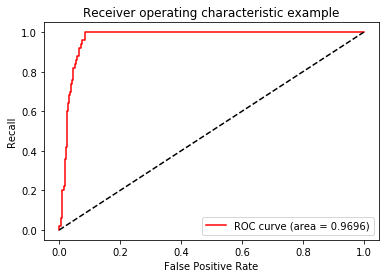

In [39]:
plt.figure()
plt.plot(FPR, recall, color='red',
        label='ROC curve (area = %0.4f)' % area) #AUC area = area

plt.plot([0, 1], [0, 1], color='black', linestyle='--') 

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example') 
plt.legend(loc="lower right")
plt.show()

### Use ROC to find best threshold:

In [42]:
max((recall - FPR).tolist())

0.914

In [45]:
maxindex = (recall - FPR).tolist().index(max(recall-FPR))
maxindex #recall, FPR

43

In [47]:
thresholds[maxindex] #decision_function

-1.0860191749391461

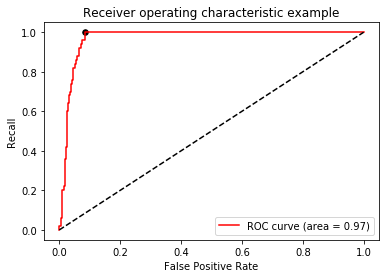

In [50]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR))
thresholds[maxindex]
#we wang to see where the doc in the graph: a black dot
# plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)

plt.figure()
plt.plot(FPR, recall, color='red',
        label='ROC curve (area = %0.2f)' % area) 

plt.plot([0, 1], [0, 1], color='black', linestyle='--') 
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30) 
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example') 
plt.legend(loc="lower right")
plt.show()